### Plotting our results in a more convenient way 

In [1]:
# Import useful libraries for computation
import numpy as np

# Import torch and libraries to deal with NN
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from pyhessian import hessian 
import copy
import pickle

# Import usefil library to visualize results
import matplotlib.pyplot as plt

# Importing the LeNet5 architecture we are going to use for our study and comparisons
from cnn_architectures import *

# Importing parameters to use with different optimizers before comparing them
import params

# Importing useful functions
from helpers import *

# Ignoring warnings to make the code more readable
import warnings
warnings.filterwarnings("ignore")

# Useful libraries to create directories
from os import makedirs
from shutil import rmtree

%load_ext autoreload
%autoreload 2

We now load the models in order the reproduce the needed plots.

In [2]:
#load adagrad data
adagrad_grad_norms = np.loadtxt('./checkpoints/adagrad_grad_norms')
adagrad_spectral_gap = np.loadtxt('./checkpoints/adagrad_spectral_gap')
adagrad_loss_list = np.loadtxt('./checkpoints/adagrad_loss_list')
adagrad_3d_loss = np.loadtxt('./checkpoints/adagrad_3d_loss')


#load adam data
adam_grad_norms = np.loadtxt('./checkpoints/adam_grad_norms')
adam_spectral_gap = np.loadtxt('./checkpoints/adam_spectral_gap')
adam_loss_list = np.loadtxt('./checkpoints/adam_loss_list')
adam_3d_loss = np.loadtxt('./checkpoints/adam_3d_loss')

#load sgd data
sgd_grad_norms = np.loadtxt('./checkpoints/sgd_grad_norms')
sgd_spectral_gap = np.loadtxt('./checkpoints/sgd_spectral_gap')
sgd_loss_list = np.loadtxt('./checkpoints/sgd_loss_list')
sgd_3d_loss = np.loadtxt('./checkpoints/sgd_3d_loss')

#load adahessian data
adahessian_grad_norms = np.loadtxt('./checkpoints/adahessian_grad_norms')
adahessian_spectral_gap = np.loadtxt('./checkpoints/adahessian_spectral_gap')
adahessian_loss_list = np.loadtxt('./checkpoints/adahessian_loss_list')
adahessian_3d_loss = np.loadtxt('./checkpoints/adahessian_3d_loss')

Let's now plot the gradient norms for each optimizer :

In [3]:
def grad_norm_plot(ax, x_data, y_data, title):
    ax.set_title(title, fontsize=12)
    ax.plot(x_data,y_data)
    #ax.set_xlabel('# Steps', fontsize=15)
    #ax.set_ylabel('Gradient norm', fontsize=15)
    #ax.legend(loc='upper right', fontsize="10")
    

Text(0.08, 0.5, 'Gradient norm [-]')

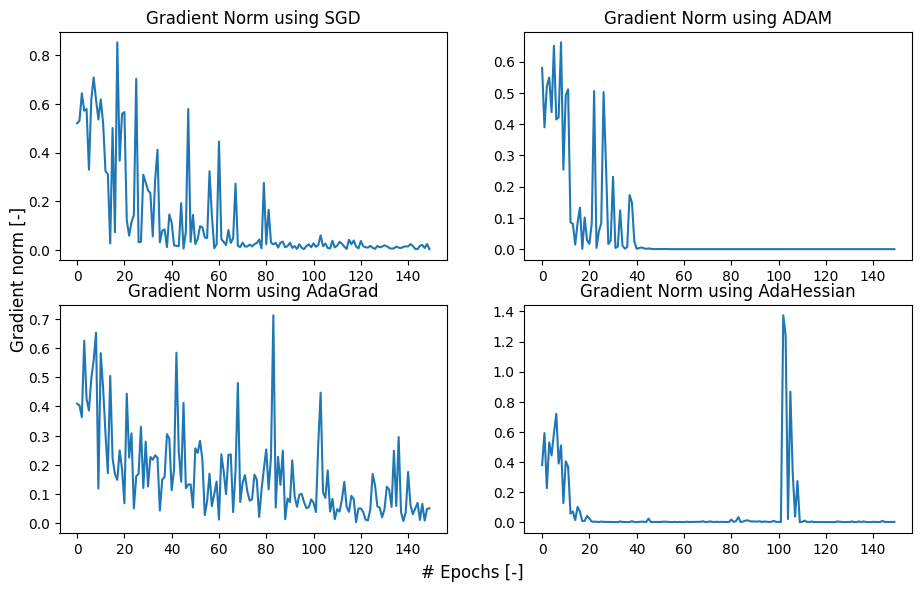

In [6]:
fig, ax = plt.subplots(2,2,figsize=(11,6.5))

grad_norm_plot(ax[0,0], range(len(sgd_grad_norms)), sgd_grad_norms, 'Gradient Norm using SGD')
grad_norm_plot(ax[0,1], range(len(adam_grad_norms)), adam_grad_norms, 'Gradient Norm using ADAM')
grad_norm_plot(ax[1,0], range(len(adagrad_grad_norms)), adagrad_grad_norms, 'Gradient Norm using AdaGrad')
grad_norm_plot(ax[1,1], range(len(adahessian_grad_norms)), adahessian_grad_norms, 'Gradient Norm using AdaHessian')

fig.text(0.5, 0.04, '# Epochs [-]', ha='center', fontsize="12")
fig.text(0.08, 0.5, 'Gradient norm [-]', va='center', rotation='vertical', fontsize="12")

Next, we plot the ratio between the two largest eigenvalues for each optimizer :

Text(0.08, 0.5, 'Ratio [-]')

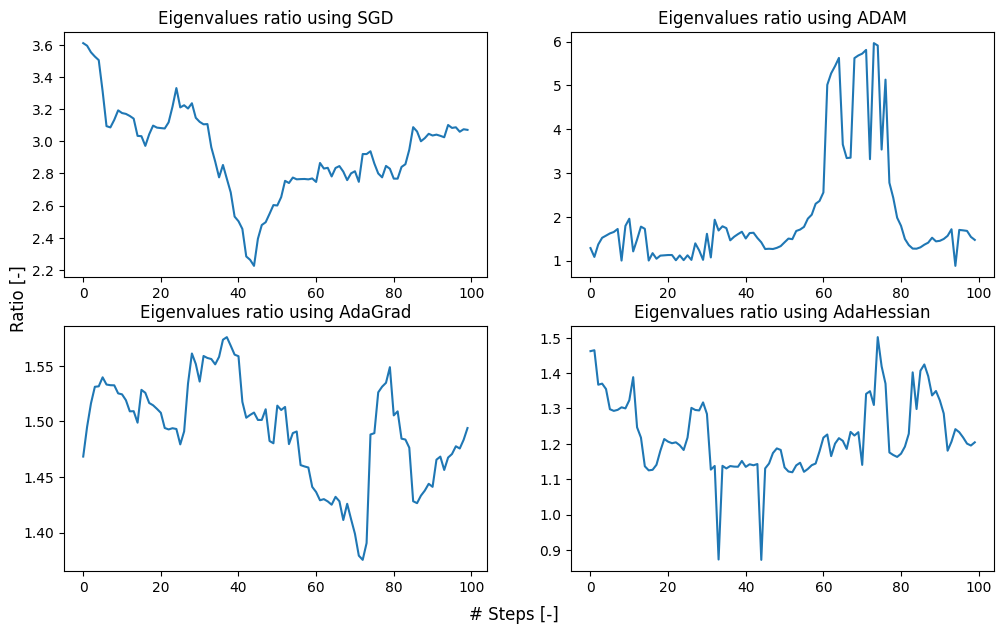

In [17]:
fig, ax = plt.subplots(2,2,figsize=(12,7))

grad_norm_plot(ax[0,0], range(len(sgd_spectral_gap)), sgd_spectral_gap, 'Eigenvalues ratio using SGD')
grad_norm_plot(ax[0,1], range(len(adam_spectral_gap)), adam_spectral_gap, 'Eigenvalues ratio using ADAM')
grad_norm_plot(ax[1,0], range(len(adagrad_spectral_gap)), adagrad_spectral_gap, 'Eigenvalues ratio using AdaGrad')
grad_norm_plot(ax[1,1], range(len(adahessian_spectral_gap)), adahessian_spectral_gap, 'Eigenvalues ratio using AdaHessian')

fig.text(0.5, 0.04, '# Steps [-]', ha='center', fontsize="12")
fig.text(0.08, 0.5, 'Ratio [-]', va='center', rotation='vertical', fontsize="12")

We can now plot the perturbed loss landscape in 2D for each optimizer :

Text(0.08, 0.5, 'Loss [-]')

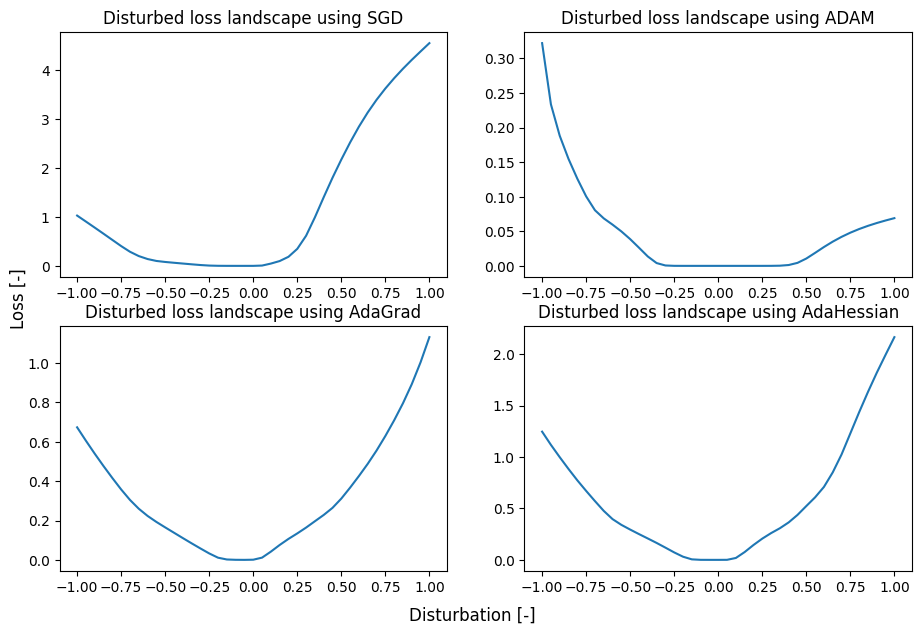

In [8]:
lams = np.linspace(-1, 1, 41).astype(np.float32)

fig, ax = plt.subplots(2,2,figsize=(11,7))

grad_norm_plot(ax[0,0], lams, sgd_loss_list, 'Disturbed loss landscape using SGD')
grad_norm_plot(ax[0,1], lams, adam_loss_list, 'Disturbed loss landscape using ADAM')
grad_norm_plot(ax[1,0], lams, adagrad_loss_list, 'Disturbed loss landscape using AdaGrad')
grad_norm_plot(ax[1,1], lams, adahessian_loss_list, 'Disturbed loss landscape using AdaHessian')

fig.text(0.5, 0.04, 'Disturbation [-]', ha='center', fontsize="12")
fig.text(0.08, 0.5, 'Loss [-]', va='center', rotation='vertical', fontsize="12")


Finally, we can plot the 3D loss landscape :

In [18]:
def plot_3d_loss_landscape(X, Y, loss, method, elev_angle, azim_angle):
    """
    Function to visualize the loss landscape function in 3D
    """
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, loss)
    ax.set_title("Disturbed loss landscape with {} optimizer based on two heighest eigenvectors".format(method))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Loss')
    ax.view_init(elev=elev_angle, azim=azim_angle)

In [19]:
steps = 41
lams =  torch.linspace(-1, 1, steps)
mus =  torch.linspace(-1, 1, steps)
X, Y = torch.meshgrid(lams, mus, indexing='xy')

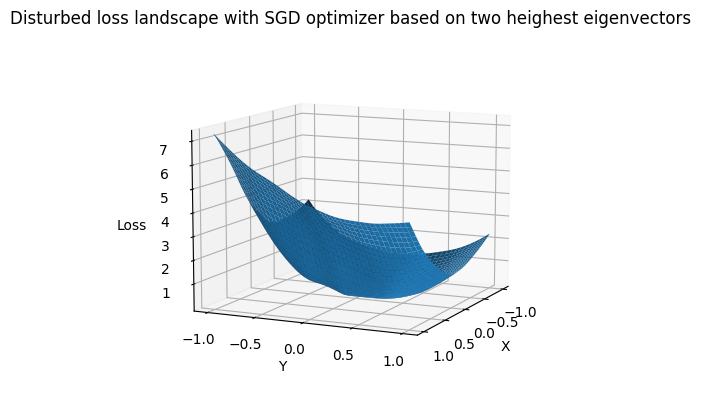

In [9]:
plot_3d_loss_landscape(X.numpy(), Y.numpy(), sgd_3d_loss, "SGD", 10, 25)

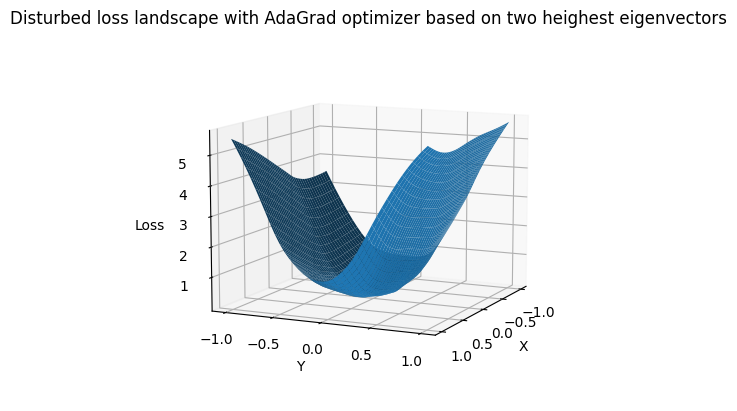

In [10]:
plot_3d_loss_landscape(X.numpy(), Y.numpy(), adagrad_3d_loss, "AdaGrad", 10, 25)

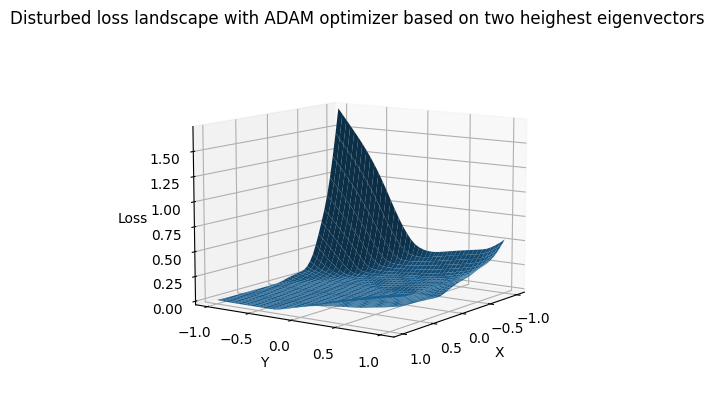

In [11]:
plot_3d_loss_landscape(X.numpy(), Y.numpy(), adam_3d_loss, "ADAM", 10, 35)

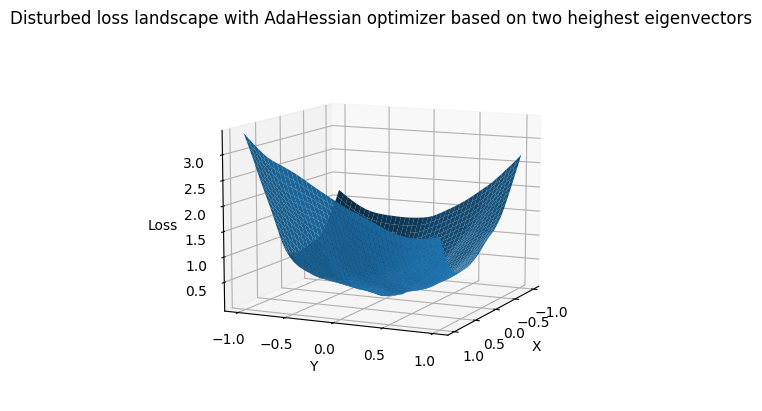

In [12]:
plot_3d_loss_landscape(X.numpy(), Y.numpy(), adahessian_3d_loss, "AdaHessian", 10, 25)